In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
results = pd.read_csv('results_compiled.csv')
results

,epoch,epoch_total,pretrain_bs,temp,lr,label_perc,test_acc,eval
0,300,500,512,0.5,0.001,0.10,0.8858,semi
1,400,500,64,0.5,0.001,1.00,0.8827,linear
2,400,500,1024,0.5,0.001,0.10,0.8879,semi
3,200,500,512,0.5,0.001,0.10,0.8727,semi
4,200,500,1024,0.5,0.001,1.00,0.8542,linear
...,...,...,...,...,...,...,...,...
70,100,500,512,0.5,0.001,0.01,0.7593,semi
71,500,500,1024,0.5,0.001,1.00,0.8829,linear
72,500,500,64,0.5,0.001,1.00,0.8871,linear
73,200,500,256,0.5,0.001,0.10,0.8772,semi


In [3]:
epochs = sorted(results['epoch'].unique())
bss = [64, 128, 256, 512, 1024]

In [4]:
bs_dict_linear = {}
bs_dict_semi_0_1 = {}
bs_dict_semi_0_01 = {}

for bs in bss:
    bs_dict_linear[bs] = []
    bs_dict_semi_0_1[bs] = []
    bs_dict_semi_0_01[bs] = []
    
for row in results.iterrows():
    bs = row[1]['pretrain_bs']
    acc = row[1]['test_acc']
    epoch = row[1]['epoch']
    eval_ = row[1]['eval']
    label_perc = row[1]['label_perc']
    
    if eval_ == 'linear':
        bs_dict_linear[bs].append([epoch, acc])
    else:
        if label_perc == 0.01:
            bs_dict_semi_0_01[bs].append([epoch, acc])
        else:
            bs_dict_semi_0_1[bs].append([epoch, acc])

for bs in bss:
    bs_dict_linear[bs] = sorted(bs_dict_linear[bs])
    bs_dict_semi_0_1[bs] = sorted(bs_dict_semi_0_1[bs])
    bs_dict_semi_0_01[bs] = sorted(bs_dict_semi_0_01[bs])    

In [5]:
linear_results = []
for bs in bss:
    res = []
    for pairs in bs_dict_linear[bs]:
        res.append(pairs[1])
    linear_results.append(res)

semi_results_0_1 = []
for bs in bss:
    res = []
    for pairs in bs_dict_semi_0_1[bs]:
        res.append(pairs[1])
    semi_results_0_1.append(res)

semi_results_0_01 = []
for bs in bss:
    res = []
    for pairs in bs_dict_semi_0_01[bs]:
        res.append(pairs[1])
    semi_results_0_01.append(res)

In [6]:
linear_results

[[0.8183, 0.8519, 0.8711, 0.8827, 0.8871],
 [0.8199, 0.8586, 0.8726, 0.8811, 0.8831],
 [0.8217, 0.8576, 0.8738, 0.8779, 0.8884],
 [0.8175, 0.8582, 0.875, 0.8835, 0.887],
 [0.8128, 0.8542, 0.8695, 0.8789, 0.8829]]

In [7]:
bs_dict_semi_0_1

{64: [[100, 0.8516],
  [200, 0.8727],
  [300, 0.8858],
  [400, 0.8939],
  [500, 0.8967]],
 128: [[100, 0.8543],
  [200, 0.8722],
  [300, 0.8832],
  [400, 0.8893],
  [500, 0.8942]],
 256: [[100, 0.8531],
  [200, 0.8772],
  [300, 0.8903],
  [400, 0.8905],
  [500, 0.8977]],
 512: [[100, 0.8473],
  [200, 0.8727],
  [300, 0.8858],
  [400, 0.8932],
  [500, 0.8955]],
 1024: [[100, 0.843],
  [200, 0.8712],
  [300, 0.8813],
  [400, 0.8879],
  [500, 0.8916]]}

In [8]:
bs_dict_semi_0_01

{64: [[100, 0.7653],
  [200, 0.7967],
  [300, 0.8169],
  [400, 0.8275],
  [500, 0.8354]],
 128: [[100, 0.7643],
  [200, 0.8002],
  [300, 0.8196],
  [400, 0.826],
  [500, 0.8290000000000001]],
 256: [[100, 0.7692],
  [200, 0.8047],
  [300, 0.8205],
  [400, 0.8314],
  [500, 0.8368]],
 512: [[100, 0.7593],
  [200, 0.8014],
  [300, 0.8159],
  [400, 0.8290000000000001],
  [500, 0.8340000000000001]],
 1024: [[100, 0.7527],
  [200, 0.7923],
  [300, 0.8077],
  [400, 0.8194],
  [500, 0.8242]]}

ERROR! Session/line number was not unique in database. History logging moved to new session 281


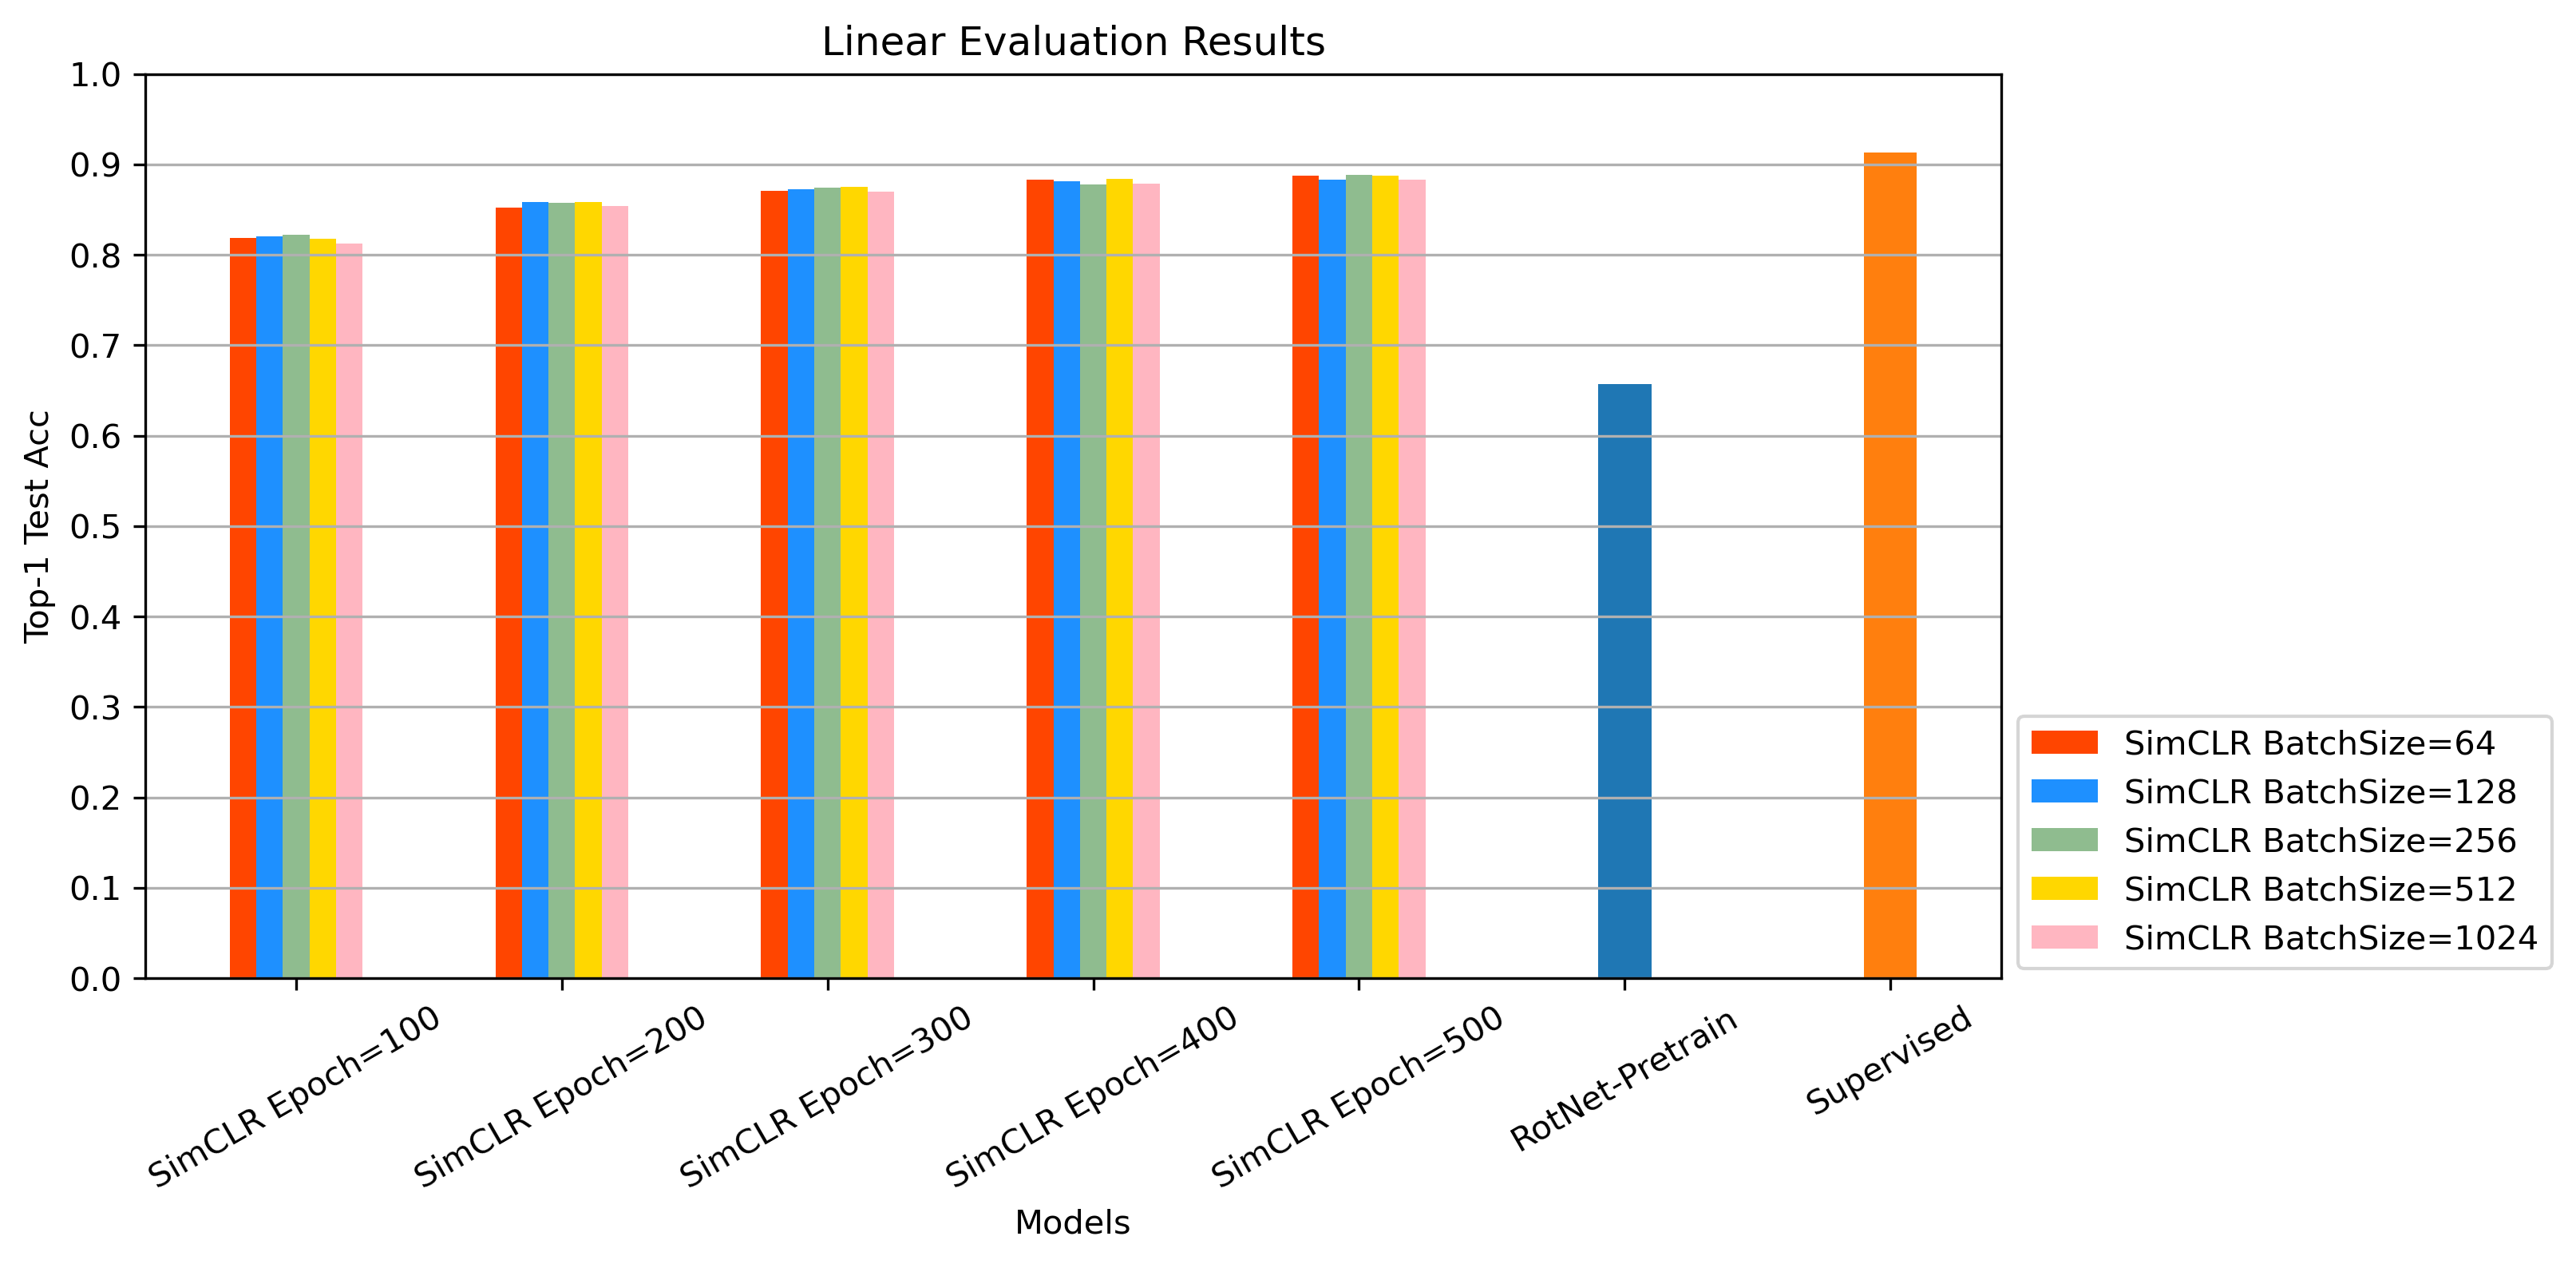

In [16]:
x_axis = np.arange(len(epochs))
width = 0.1
fig = plt.figure(figsize=(10, 5), dpi=300)
colors = ['orangered', 'dodgerblue', 'darkseagreen', 'gold', 'lightpink']
for idx, offset in enumerate([-2, -1, 0, 1, 2]):
    plt.bar(x_axis+width*offset, linear_results[idx], width=width, color=colors[idx], label=f'SimCLR BatchSize={bss[idx]}')
# plt.bar(5, 0.672, width=0.2)
plt.bar(5, 0.6572, width=0.2)
plt.bar(6, 0.9132, width=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.15))
plt.xticks(list(x_axis)+[5, 6], ['SimCLR Epoch='+str(x) for x in epochs]+['RotNet-Pretrain', 'Supervised'], rotation=30)
plt.xlabel('Models')
plt.ylabel('Top-1 Test Acc')
plt.yticks(np.around(np.arange(0, 1.1, 0.1), 2), np.around(np.arange(0, 1.1, 0.1), 1))

plt.grid(axis='y')
plt.title('Linear Evaluation Results')
plt.show()

Text(0.5, 1.0, 'Semi-supervised Learning Evaluation Results (Label Perc=0.01)')

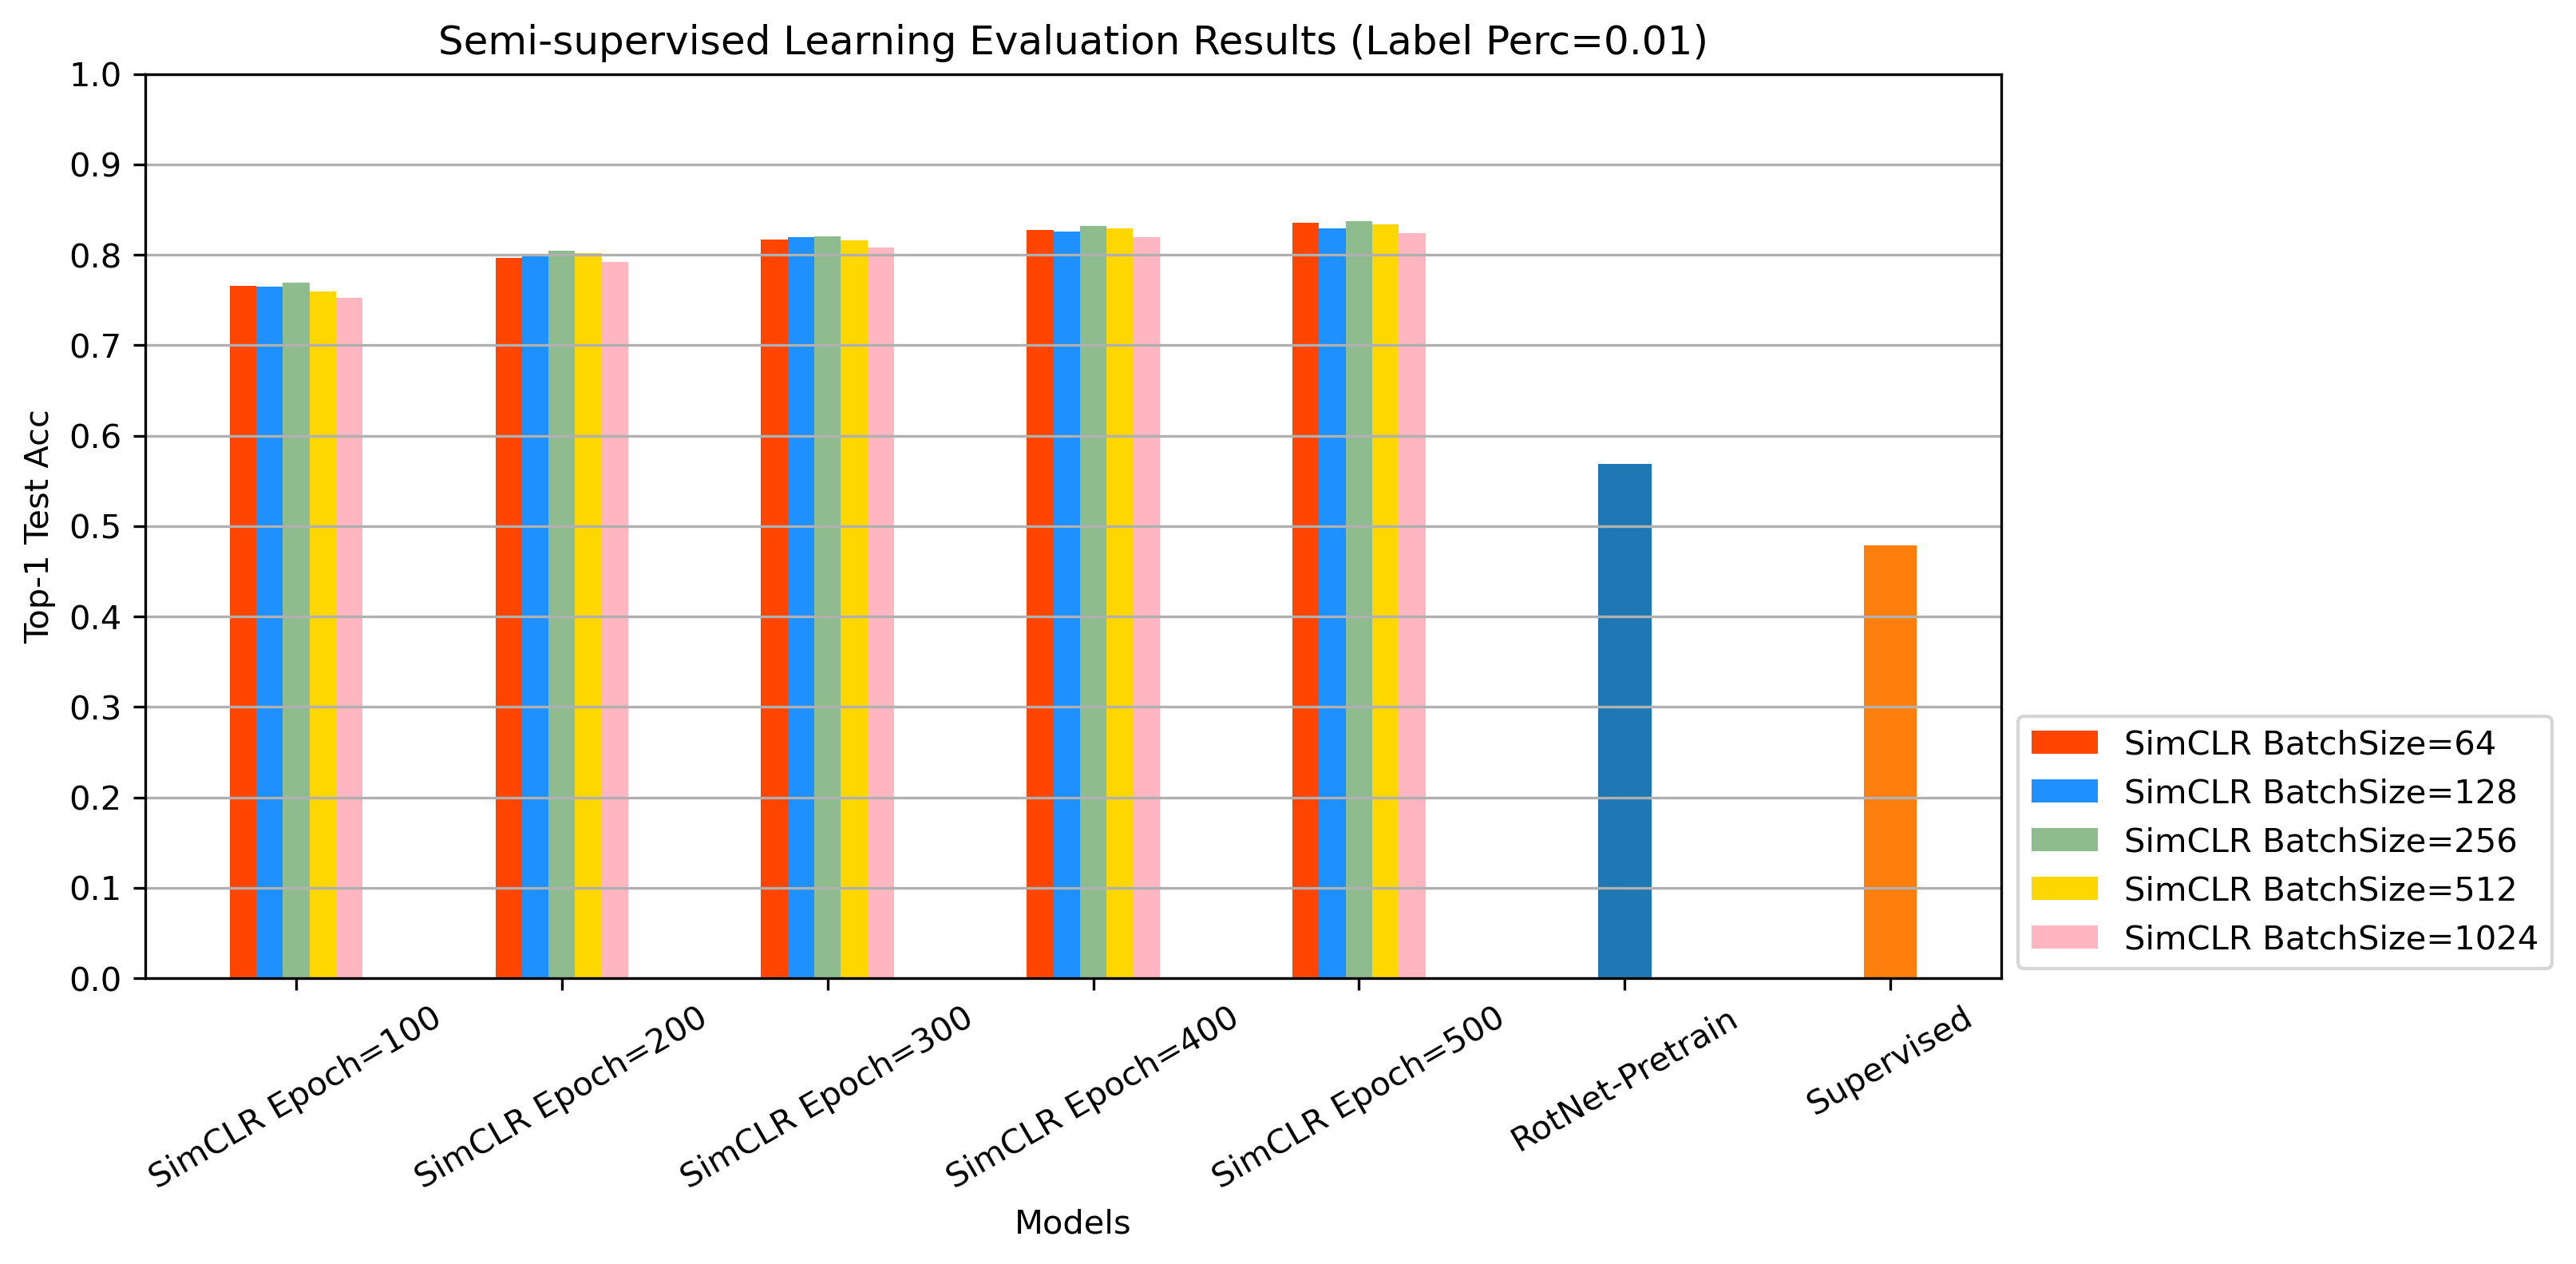

In [17]:
x_axis = np.arange(len(epochs))
width = 0.1
fig = plt.figure(figsize=(10, 5), dpi=300)
colors = ['orangered', 'dodgerblue', 'darkseagreen', 'gold', 'lightpink']
for idx, offset in enumerate([-2, -1, 0, 1, 2]):
    plt.bar(x_axis+width*offset, semi_results_0_01[idx], width=width, color=colors[idx], label=f'SimCLR BatchSize={bss[idx]}')
# plt.bar(5, 0.607, width=0.2)
plt.bar(5, 0.5688, width=0.2)
plt.bar(6, 0.4787, width=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.15))
plt.xticks(list(x_axis)+[5, 6], ['SimCLR Epoch='+str(x) for x in epochs]+['RotNet-Pretrain', 'Supervised'], rotation=30)
plt.xlabel('Models')
plt.ylabel('Top-1 Test Acc')
plt.yticks(np.around(np.arange(0, 1.1, 0.1), 2), np.around(np.arange(0, 1.1, 0.1), 1))

plt.grid(axis='y')
plt.title('Semi-supervised Learning Evaluation Results (Label Perc=0.01)')

ERROR! Session/line number was not unique in database. History logging moved to new session 282


Text(0.5, 1.0, 'Semi-supervised Learning Evaluation Results (Label Perc=0.1)')

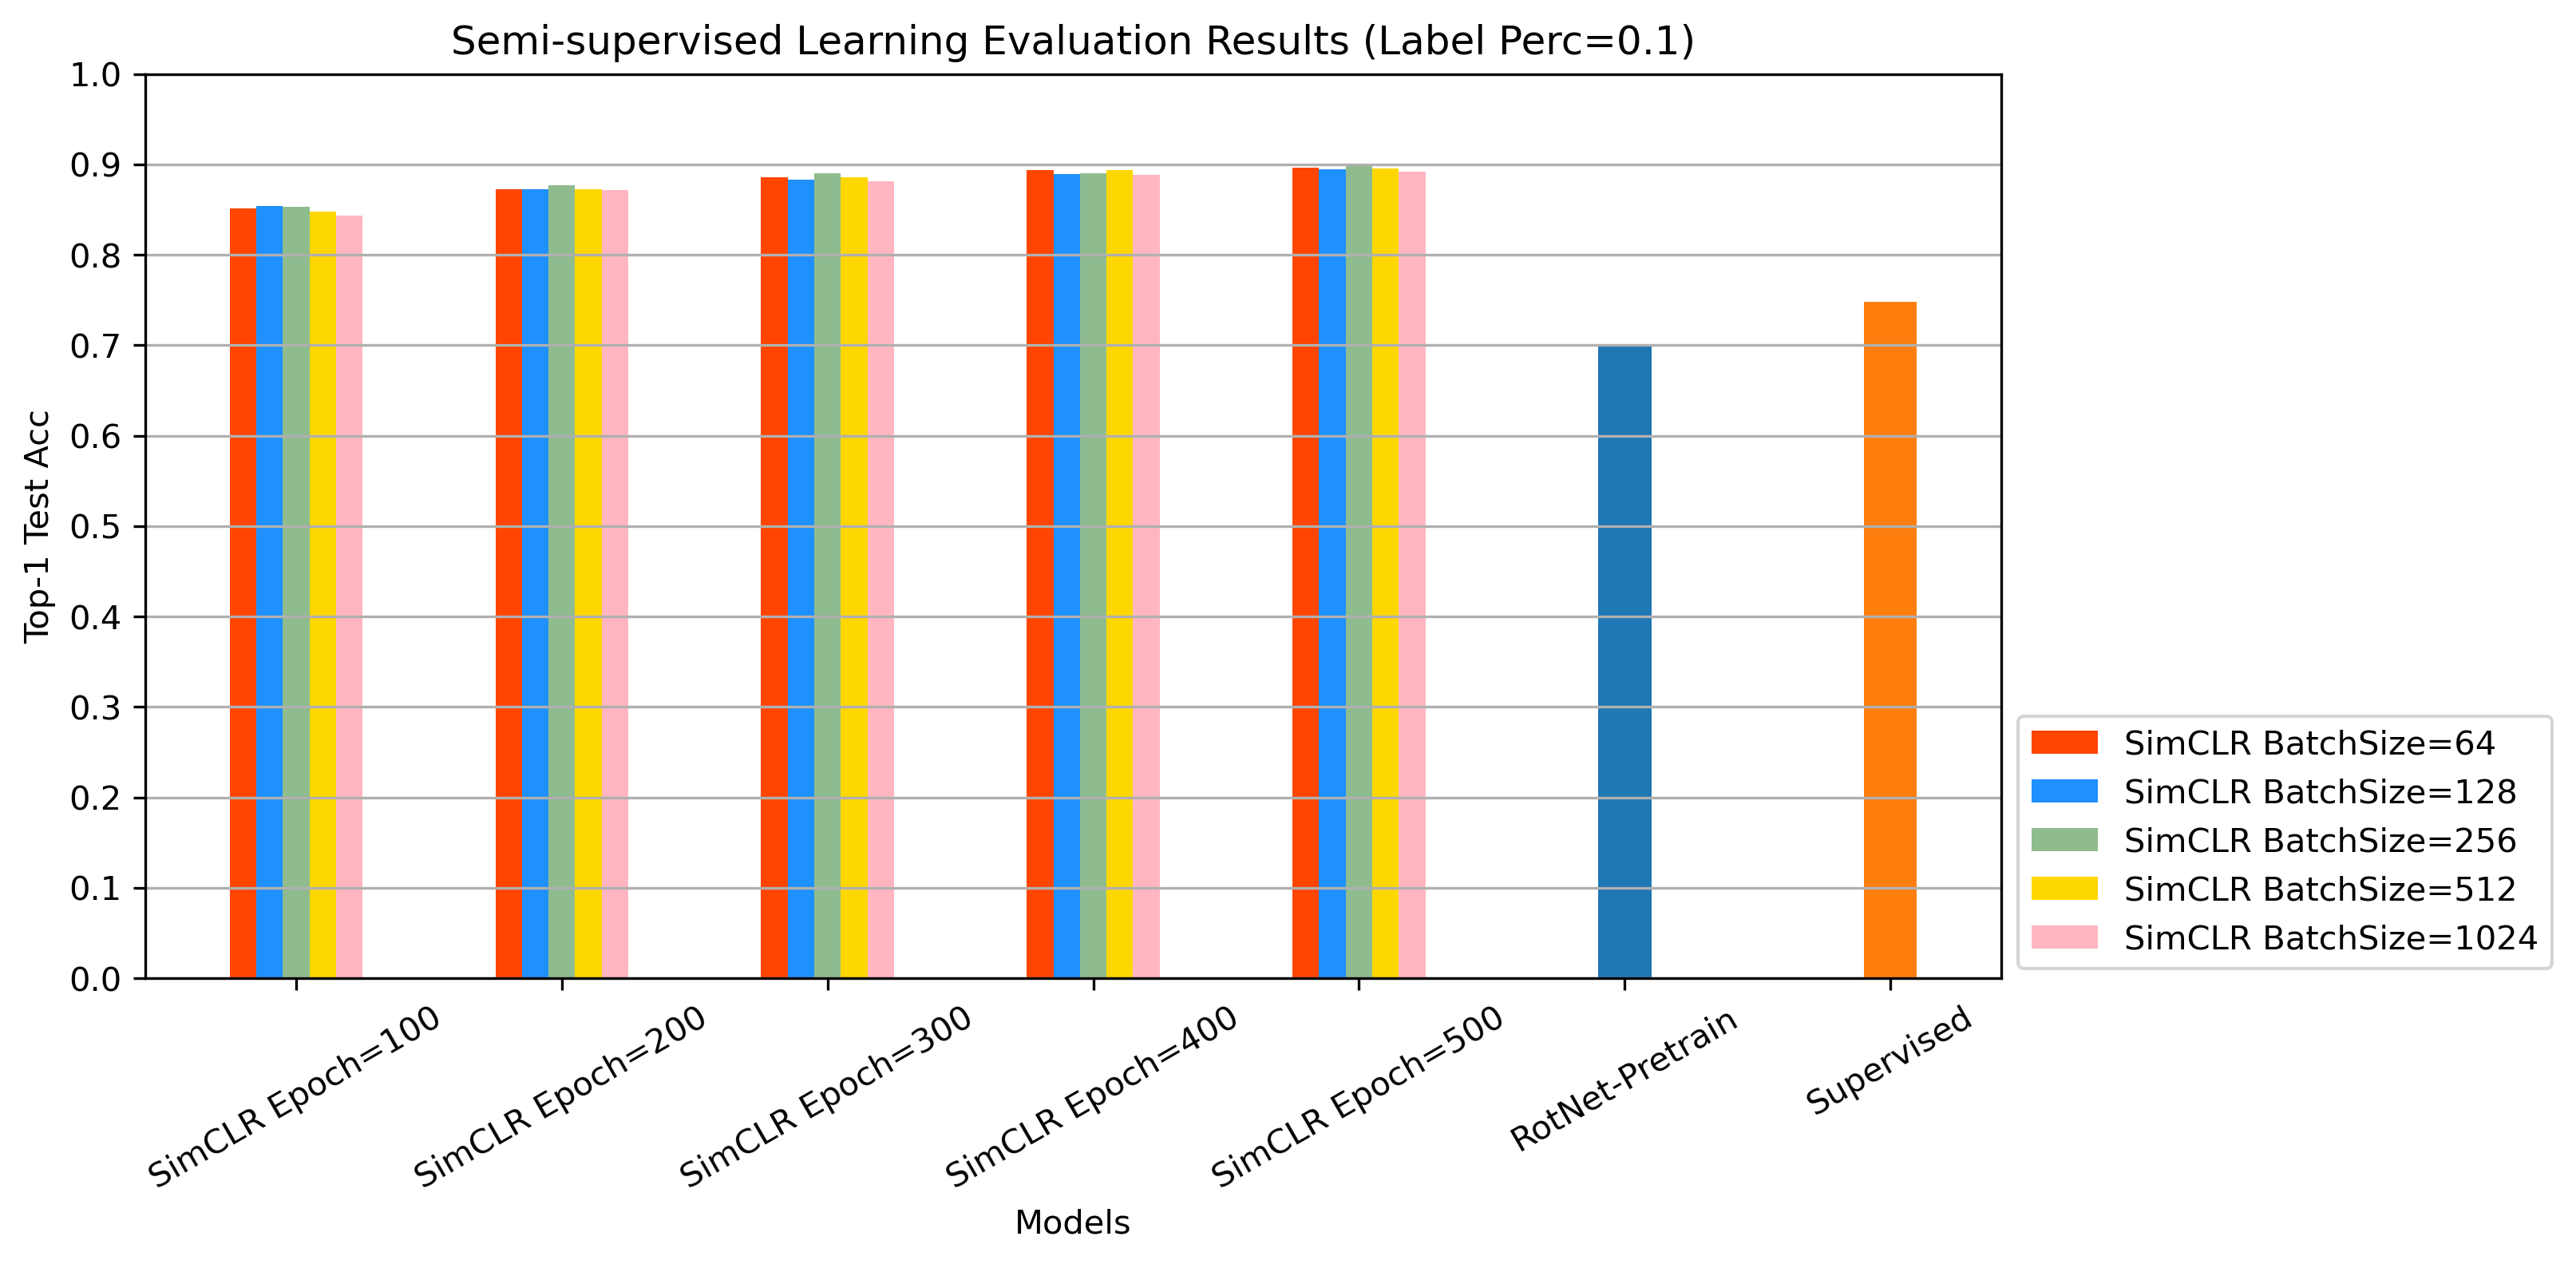

In [19]:
x_axis = np.arange(len(epochs))
width = 0.1
fig = plt.figure(figsize=(10, 5), dpi=300)
colors = ['orangered', 'dodgerblue', 'darkseagreen', 'gold', 'lightpink']
for idx, offset in enumerate([-2, -1, 0, 1, 2]):
    plt.bar(x_axis+width*offset, semi_results_0_1[idx], width=width, color=colors[idx], label=f'SimCLR BatchSize={bss[idx]}')
# plt.bar(5, 0.738, width=0.2)
plt.bar(5, 0.6994, width=0.2)
plt.bar(6, 0.7477, width=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.15))
plt.xticks(list(x_axis)+[5, 6], ['SimCLR Epoch='+str(x) for x in epochs]+['RotNet-Pretrain', 'Supervised'], rotation=30)
plt.xlabel('Models')
plt.ylabel('Top-1 Test Acc')
plt.yticks(np.around(np.arange(0, 1.1, 0.1), 2), np.around(np.arange(0, 1.1, 0.1), 1))

plt.grid(axis='y')
plt.title('Semi-supervised Learning Evaluation Results (Label Perc=0.1)')